In [1]:
import numpy as np
import matplotlib.pyplot as plt

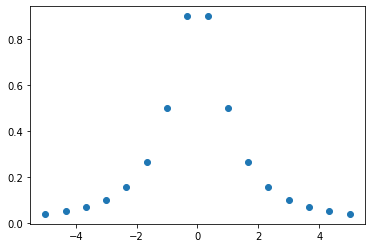

In [8]:
n = 15

xk = np.array([-5 + k * (10 / n) for k in range(n + 1)])
yk = np.array([1 / (1 + xk[i] ** 2) for i in range(xk.size)])
plt.scatter(xk, yk)
plt.show()

# разделенная разность

In [ ]:
def P(x: np.array, n: int):
	if n >= 1:
		return (P(x[0:-2] - P(x[1:-1])) / )